# Home project task package 1: Application of machine learning on prediction of thermal conductivity in SiOC glass ceramics 

Runxin,Zhang

#Task 1

In [70]:
import numpy as np
import glob

folder_path = "/Users/Ariel/Documents/达姆/3/machine learning/Group12/Group12/Data"

# Create a list to store the loaded data and get the list of .npy files in the folder
data_list = []
file_list = glob.glob(folder_path + "/*.npy")

# Load each .npy file
for file_path in file_list:
    data = np.load(file_path)
    data_list.append(data)

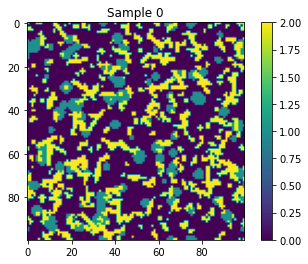

Sample 0 - Composition 0: Fraction 0.64
Sample 0 - Composition 1: Fraction 0.11
Sample 0 - Composition 2: Fraction 0.26



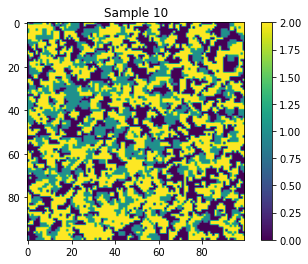

Sample 10 - Composition 0: Fraction 0.32
Sample 10 - Composition 1: Fraction 0.21
Sample 10 - Composition 2: Fraction 0.47



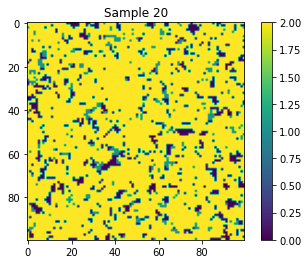

Sample 20 - Composition 0: Fraction 0.11
Sample 20 - Composition 1: Fraction 0.03
Sample 20 - Composition 2: Fraction 0.85



In [71]:
#Visualize some of the cross-sections
import matplotlib.pyplot as plt

# Select the data samples to visualize
sample_indices = [0, 10, 20]

for index in sample_indices:
    data = data_list[index]
    cross_section = data[:, :, 50]# visualize the cross-section at index 50
    
    # Calculate fractions of compositions
    unique_values, value_counts = np.unique(cross_section, return_counts=True)
    total_pixels = cross_section.size
    fractions = value_counts / total_pixels

    plt.imshow(cross_section)  
    plt.title(f"Sample {index}")
    plt.colorbar()
    plt.show()
    
    for value, fraction in zip(unique_values, fractions):
        print(f"Sample {index} - Composition {value}: Fraction {fraction:.2f}")
    print()


In [73]:
import pandas as pd

df1 = pd.read_csv('npy_filename_with_thermal_conductivity_group12.csv')
df1["File Names"] = df1["File Names"].str.replace(".npy", "",regex=True)
#print(df1)


In [76]:
import os

df2 = pd.DataFrame(columns=["Sample", "Composition 0", "Composition 1", "Composition 2"])

for file_path in file_list:
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    data = np.load(file_path)

    # Calculate the volume fraction for each composition
    unique_values, value_counts = np.unique(data, return_counts=True)
    total_voxels = data.size
    fractions = value_counts / total_voxels

    sample_data = {"Sample": file_name}
    for value, fraction in zip(unique_values, fractions):
        sample_data[f"Composition {value}"] = fraction

    df2 = df2.append(sample_data, ignore_index=True)

# print(df2)


In [ ]:
#check the value is matched or not
# selected_row = df2.loc[df2['Sample'] == 'XDOO4L']
# selected_row

In [79]:
#Characteristics are associated with the thermal conductivity provided
merged_df = pd.merge(df1, df2, left_on="File Names", right_on="Sample")
merged_df = merged_df.drop(columns=["Sample","Unnamed: 0"])
df=merged_df.drop(columns=["File Names"])
# merged_df

In [82]:
#get the correlation matrix
correlation_matrix = df.corr()
# print(correlation_matrix)

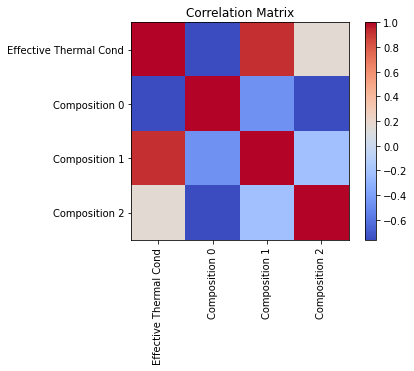

Feature: Composition 0, Correlation: -0.76, p-value: 0.0000
Feature: Composition 1, Correlation: 0.92, p-value: 0.0000
Feature: Composition 2, Correlation: 0.16, p-value: 0.0021


In [83]:
import scipy.stats as stats

# Plotting the heat map of the correlation matrix
plt.figure(figsize=(6, 4))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.title('Correlation Matrix')
plt.show()

# Calculate the correlation coefficient and p-value of each feature with Effective Thermal Conductivity
for column in df.columns[1:]:
    correlation, p_value = stats.pearsonr(df['Effective Thermal Cond'], df[column])
    print(f"Feature: {column}, Correlation: {correlation:.2f}, p-value: {p_value:.4f}")


In [84]:
#sklearn machine learning model and feed forward neural network model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Composition 0', 'Composition 1', 'Composition 2']].values
y = df['Effective Thermal Cond'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Metrics:")
print("Mean Squared Error:", rf_mse)
print("R-squared Score:", rf_r2)

# Train a Feed Forward Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(150), random_state=100,max_iter=500)
nn_model.fit(X_train, y_train)

nn_predictions = nn_model.predict(X_test)

nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

print("\nNeural Network Metrics:")
print("Mean Squared Error:", nn_mse)
print("R-squared Score:", nn_r2)


Random Forest Metrics:
Mean Squared Error: 0.0009119173611111153
R-squared Score: 0.9954822839860352

Neural Network Metrics:
Mean Squared Error: 0.0034822736092766046
R-squared Score: 0.9827485209509913


As compared to linear regression and decision trees, I chose random forests Regressor.Linear regression assumes a linear relationship between the features and the target variable, and decision trees can be prone to overfitting. However, the Random Forest regressor incorporates multiple decision trees, which allows it to handle complex nonlinear relationships and interactions between features more effectively.
Mean Squared Error (MSE) and R-squared score are selected as evaluation metrics.

#Task 2

In [87]:
# Create a list to store the sliced data and their corresponding information
sliced_data_list = []

for file_path in file_list:
    data = np.load(file_path)
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    # Retrieve the corresponding Effective Thermal Conductivity value from df1
    thermal_cond = df1.loc[df1['File Names'] == file_name, 'Effective Thermal Cond'].values[0]

    num_slices = 5
    depth_interval = data.shape[2] // num_slices
    
    for i in range(num_slices):
        depth_index = i * depth_interval
        slice_data = data[:, :, depth_index]
        slice_info = {
            "File Name": file_name,
            "Thermal Conductivity":thermal_cond,
            "Slice Array": slice_data
        }

        sliced_data_list.append(slice_info)

# sliced_data_array = np.array(sliced_data_list)
sliced_data_df = pd.DataFrame(sliced_data_list)
# sliced_data_df.to_csv('sliced_data.csv', index=False)
# print(sliced_data_array)
# sliced_data_df

In [89]:
#Train a CNN model
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

class SlicedDataDataset(Dataset):
    def __init__(self, sliced_data_list):
        self.sliced_data_list = sliced_data_list

    def __len__(self):
        return len(self.sliced_data_list)

    def __getitem__(self, index):
        slice_info = self.sliced_data_list[index]
        slice_data = slice_info["Slice Array"]
        thermal_cond = slice_info["Thermal Conductivity"]

        slice_data = (slice_data - slice_data.mean()) / slice_data.std()

        slice_data = torch.from_numpy(slice_data).unsqueeze(0).float()
        thermal_cond = torch.tensor(thermal_cond).float()

        return slice_data, thermal_cond

train_data = sliced_data_list[:1500] 
test_data = sliced_data_list[1500:]

train_dataset = SlicedDataDataset(train_data)
test_dataset = SlicedDataDataset(test_data)

batch_size = 10  # Adjust as per your hardware capabilities
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [90]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2)
        
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.fc1 = nn.Linear(128 * 6 * 6, 256)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = self.pool4(self.relu4(self.conv4(x)))
        x = x.view(x.size(0), -1)
        x = self.relu5(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNNModel()

In [91]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [92]:
num_epochs = 15

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

C:\Users\Ariel\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/15], Loss: 0.4674
Epoch [2/15], Loss: 0.0343
Epoch [3/15], Loss: 0.0320
Epoch [4/15], Loss: 0.0298
Epoch [5/15], Loss: 0.0294
Epoch [6/15], Loss: 0.0314
Epoch [7/15], Loss: 0.0290
Epoch [8/15], Loss: 0.0296
Epoch [9/15], Loss: 0.0316
Epoch [10/15], Loss: 0.0307
Epoch [11/15], Loss: 0.0279
Epoch [12/15], Loss: 0.0286
Epoch [13/15], Loss: 0.0300
Epoch [14/15], Loss: 0.0303
Epoch [15/15], Loss: 0.0296


In [93]:
model.eval()
total_loss = 0.0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

    test_loss = total_loss / len(test_dataset)
    print(f"Test Loss: {test_loss:.4f}")


Test Loss: 0.0310


In summary, the data is much inflated when processing images compared to previously trained feature-based models.
Although the complexity of CNN seems to be higher, CNN also performs well，with a low loss value.In the real case of only images are provided, CNN modle can also solve the problem.
To further improve the accuracy, the structure of the CNN can be optimized. Increase the data volume, increase model complexity which means add more layers, increase the number of filters in each layer.

#Task 3

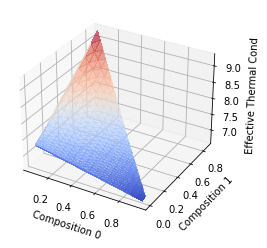

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_trisurf(df['Composition 0'], df['Composition 1'], df['Effective Thermal Cond'], cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.6)

ax.set_xlabel('Composition 0')
ax.set_ylabel('Composition 1')
ax.set_zlabel('Effective Thermal Cond')

plt.show()


According to the above correlation matrix, component 0: -0.76, component 1: 0.92, and component 2: 0.16,Component 2 has the lowest correlation, so removing component 2 allows the data to be 3d visualized

Best point after 10 queries are: [[0.5124113  0.35566769]] [[12.07357194]]


C:\Users\Ariel\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:137: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  position3d = np.array((self._x, self._y, self._z))
C:\Users\Ariel\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


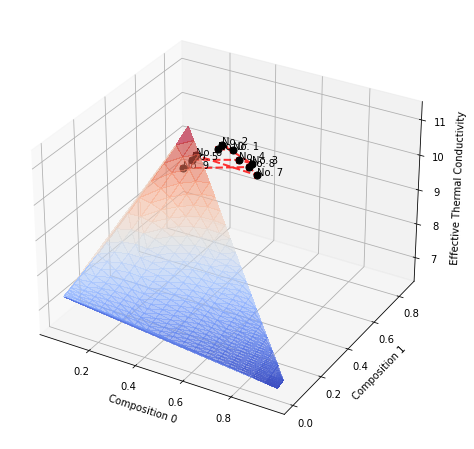

In [68]:
#use the Bayesian Optimization framework and the Gaussian Process step to optimize the property and minimize the search effort in the feature space
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared, Matern, RBF
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from modAL.acquisition import optimizer_EI, max_EI, max_UCB, PI
from modAL.models import BayesianOptimizer

X0 = df['Composition 0'].values
X1 = df['Composition 1'].values
Z = df['Effective Thermal Cond'].values

X_shaped = np.vstack((X0, X1)).T

StSc_X = StandardScaler()
X_scaled = StSc_X.fit_transform(X_shaped)

Y = Z.reshape(-1, 1)

StSc_Y = StandardScaler()
Y_scaled = StSc_Y.fit_transform(Y)

X_initial, Y_initial = X_shaped, Y

regressor = GaussianProcessRegressor()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(X0,X1,Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.6)

# Bayesian Optimization:
query_list = []
X_1 = []
X_2 = []
Z_ = []

regressor = GaussianProcessRegressor(kernel=Matern())

optimizer = BayesianOptimizer(estimator=regressor, X_training=X_initial, y_training=Y_initial, query_strategy=max_EI)

for n_query in range(10):
    query_idx, query_inst = optimizer.query(X_scaled)
    query_list.append(query_idx)
    optimizer.teach(X_scaled[query_idx, :].reshape(1, -1), Y[query_idx].reshape(1, -1))

    Y_pred, Y_std = optimizer.predict(X_scaled, return_std=True)
    Y_pred, Y_std = Y_pred.ravel(), Y_std.ravel()
    X_max, Y_max = optimizer.get_max()

    X1 = StSc_X.inverse_transform(X_scaled[query_idx, :].reshape(1, -1))[0][0]
    X2 = StSc_X.inverse_transform(X_scaled[query_idx, :].reshape(1, -1))[0][1]
    Z_val = StSc_Y.inverse_transform(Y[query_idx][0].reshape(-1, 1))

    X_1.append(X1)
    X_2.append(X2)
    Z_.append(Z_val[0][0])
    ax.scatter(X1, X2, Z_val, c='k', s=50)
    ax.text(X1, X2, Z_val, "No. {:}  ".format(n_query), zdir=(0, 0, 0))

ax.set_xlabel("Composition 0")
ax.set_ylabel("Composition 1")
ax.set_zlabel("Effective Thermal Conductivity")
ax.plot(X_1, X_2, Z_, "r-->", alpha=0.8, linewidth=2)

X_max, Y_max_in_queried = optimizer.get_max()
X_max_pred = StSc_X.inverse_transform(X_max.reshape(1, -1))
Y_max_data = StSc_Y.inverse_transform(Y_max_in_queried.reshape(1, -1))

print("Best point after 10 queries are:", X_max_pred, Y_max_data)

plt.show()

As can be seen from the visualization，composition 1 has the highest thermal conductivity and therefore its amount has the greatest effect on this property. Small additions of the other two phases increase the thermal conductivity.
The Bayesian optimization and the CNN shows the same influences of the features to the target values.